p.s -to predict whether the person is daibetic or not
preg= pregnancy
pres-pressure
mass- bmi
class- diabetic or not
thickness- skinthickness
test- insulin
pedi- pedigree function
plas- plasma

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [453]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [454]:
df.shape

(768, 9)

In [455]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [457]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [458]:
df.value_counts()

Preg  Plas  Pres  skin  test  mass  pedi   age  class
0     57    60    0     0     21.7  0.735  67   0        1
      67    76    0     0     45.3  0.194  46   0        1
5     103   108   37    0     39.2  0.305  65   0        1
      104   74    0     0     28.8  0.153  48   0        1
      105   72    29    325   36.9  0.159  28   0        1
                                                        ..
2     84    50    23    76    30.4  0.968  21   0        1
      85    65    0     0     39.6  0.930  27   0        1
      87    0     23    0     28.9  0.773  25   0        1
            58    16    52    32.7  0.166  25   0        1
17    163   72    41    114   40.9  0.817  47   1        1
Length: 768, dtype: int64

In [459]:
df['skin'].value_counts()  #thickness of skin cannot be skin

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: skin, dtype: int64

In [460]:
X=df.drop(["class"],axis=1)
y=df[["class"]]

In [461]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [462]:
model_lrc=LogisticRegression()

In [463]:
model_lrc.fit(X_train,y_train)

LogisticRegression()

In [464]:
model_lrc.score(X_train,y_train)

0.7821229050279329

In [465]:
model_lrc.score(X_test,y_test)

0.7402597402597403

In [466]:
df1=df.copy()

### replacing all the 0 values with median 

In [467]:
df1['Plas']=df['Plas'].replace(0,np.median(df1["Plas"]))
df1['Pres']=df['Pres'].replace(0,np.median(df1["Pres"]))
df1['skin']=df['skin'].replace(0,np.median(df1["skin"]))
df1['test']=df['test'].replace(0,np.median(df1["test"]))
df1['mass']=df['mass'].replace(0,np.median(df1["mass"]))
df1['pedi']=df['pedi'].replace(0,np.median(df1["pedi"]))
df1['age']=df['age'].replace(0,np.median(df1["age"]))

In [468]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [469]:
df1["skin"].value_counts()

23    249
32     31
30     27
27     23
28     20
33     20
18     20
31     19
19     18
39     18
29     17
25     16
37     16
40     16
22     16
26     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
45      6
16      6
43      6
11      6
14      6
44      5
10      5
47      4
48      4
50      3
49      3
54      2
7       2
52      2
8       2
56      1
51      1
60      1
63      1
99      1
Name: skin, dtype: int64

In [470]:
X=df1.drop(["class"],axis=1)
y=df1[["class"]]

In [471]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [472]:
model_lrc_1=LogisticRegression()

In [473]:
model_lrc_1.fit(X_train,y_train)

LogisticRegression()

In [474]:
model_lrc_1.score(X_train,y_train)

0.7877094972067039

In [475]:
model_lrc_1.score(X_test,y_test)

0.7532467532467533

In [476]:
model_svc=SVC()

In [477]:
model_svc.fit(X_train,y_train)

SVC()

In [478]:
model_svc.score(X_train,y_train)

0.7783985102420856

In [479]:
model_svc.score(X_test,y_test)

0.7402597402597403

In [480]:
768*0.30

230.39999999999998

In [481]:
predictions= model_lrc.predict(X_test)

In [482]:
accuracy_score(y_test,predictions)

0.7445887445887446

<AxesSubplot:>

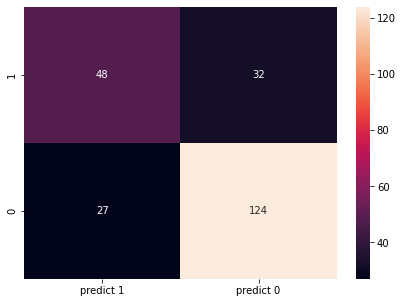

In [483]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [484]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Performance Metrics from Confusion Matrix:

Accuracy: Measures the overall correctness of the model's predictions.

Accuracy = (TP + TN) / (TP + TN + FP + FN)


Precision: Measures the accuracy of positive predictions made by the model.

Precision = TP / (TP + FP)

Recall (Sensitivity or True Positive Rate): Measures the model's ability to identify all positive instances.

Recall = TP / (TP + FN)

Specificity (True Negative Rate): Measures the model's ability to identify all negative instances.
 
Specificity = TN / (TN + FP)

F1-Score: Combines precision and recall, providing a balance between them.

F1-Score = (2 * Precision * Recall) / (Precision + Recall)
ROC Curve (Receiver Operating Characteristic Curve): A graphical representation showing the trade-off between true positive rate (sensitivity) and false positive rate as the classification threshold varies. AUC-ROC (Area Under the ROC Curve): Quantifies the overall performance of a classification model. A value closer to 1 indicates better performance.


# support vector classifier

In [485]:
model_svc1=SVC(kernel='linear')

In [486]:
model_svc1.fit(X_train,y_train)

SVC(kernel='linear')

In [487]:
model_svc1.score(X_train,y_train)

0.7821229050279329

In [488]:
model_svc1.score(X_test,y_test)

0.7359307359307359

# Decision tree classifier

In [489]:
# important model
#challenge is that it would be an overfitting model

In [490]:
from sklearn.tree import DecisionTreeClassifier

In [491]:
model_dtc=DecisionTreeClassifier(max_depth=3)  #pruning

In [492]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [493]:
model_dtc.score(X_train,y_train)

0.7653631284916201

In [494]:
model_dtc.score(X_test,y_test)

0.7186147186147186

In [495]:
# important interview ques how decision tree works

KNN Model

In [496]:
from sklearn.neighbors import KNeighborsClassifier 

In [497]:
model_2 = KNeighborsClassifier(n_neighbors=10,p=2)

In [498]:
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [499]:
predicted_labels=model_2.predict(X_test)
model_2.score(X_test,y_test)

0.7186147186147186

In [500]:
model_2.score(X_train,y_train)

0.7877094972067039

In [501]:
from sklearn.naive_bayes import GaussianNB

In [502]:
model_nb= GaussianNB() 

In [503]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [504]:
print(model_nb.score(X_train,y_train))
print(model_nb.score(X_test,y_test))

0.7560521415270018
0.7316017316017316


ensemble model- group of models 

linear reg, logistic, svm,dt,nb,knn (all are single models)

In [505]:
## bagging classifier - supervised learning model for both reg and class ----it means sampling with replacements
##results will be consolidated --it is a parallel process

In [506]:
from sklearn.ensemble import BaggingClassifier

In [507]:
model_bgc=BaggingClassifier(n_estimators=96,base_estimator=model_dtc)  #control overfitting

In [508]:
model_bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=96)

In [509]:
print(model_bgc.score(X_train,y_train))
print(model_bgc.score(X_test,y_test))

0.7951582867783985
0.7489177489177489


In [510]:
## boosting model

In [511]:
from sklearn.ensemble import AdaBoostClassifier

In [512]:
model_adbc=AdaBoostClassifier(n_estimators=8)  #control overfitting

In [513]:
model_adbc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=8)

In [514]:
print(model_adbc.score(X_train,y_train))
print(model_adbc.score(X_test,y_test))

0.7970204841713222
0.7532467532467533


In [515]:
## gradient boosting model

In [516]:
from sklearn.ensemble import GradientBoostingClassifier

In [548]:
model_gbc=GradientBoostingClassifier(n_estimators=10,max_depth=3)  #control overfitting

In [549]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [550]:
print(model_gbc.score(X_train,y_train))
print(model_gbc.score(X_test,y_test))

0.8044692737430168
0.7532467532467533
